### Problem Statement:

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

### Business Goal 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [594]:
# Importing relevant libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from xgboost import XGBRegressor

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [595]:
# reading the dataset
house = pd.read_csv("train.csv",encoding='iso-8859-1')

In [596]:
print(house.shape)
house.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The dataset has 1460 rows and 81 columns in its entirety.

In [597]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can observe from above details that the dataset has 3 float, 35 int and 43 categorical variables. Also we can notice some of the variables have missing values as well. We can inspect the missing values in next few steps.

In [598]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Firstly, we can observe that all the numeric variables have different scales, which is natural and expected.
- We can observe few columns which are realted to TimePeriod like, YearBuilt, YearRemodAdd, GarageYrBlt, etc.
    We might have to derive some features out of these and discard others which are of less significance.
- Id columns seems to be index
- LotFrontage, which is Linear feet of street connected to property, maximum 313ft and mean of 56ft of road is connected to the properties. Also, this  column has no nulls.
- LotArea, which is Lot size in square feet, in average for most of the properties is 10516.828082 sqft.
- TotalBsmtSF, which is Total square feet of basement area, in average is 1057 sqft for most of the houses. Also, there is instance of properties which DO NOT have basement. It would mean that such properties to have lesser sale value.

In [599]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

### 1. Missing Values

Inspecting the data dictionary we can notice that there are a bunch of variables which have NA as onr of its categories. Meaning those are not missing values but NA signifies something. We can convert such values to something other than NA which would save those records from not being treated as Missing values.

In [600]:
# Identifying columns where NA is not Null
FalseNA = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure",
           "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual",
           "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [601]:
# Replacing NA with some other value
print(100*house.isnull().sum()/house.shape[0])
house[FalseNA] = house[FalseNA].replace({np.nan:"No", 'NA':"No"})

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [602]:
# Inspecting NA replacement by checking missing values again
100*house.isnull().sum()/house.shape[0]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
B

We can confirm that the replacements have worked corrrectly with less number of variables with missing values. Although there are few categorical variables which have missing values we can try to impute values to these instances rather than deleting. 

In [603]:
# Mode values in a dataframe
modeData = house.mode()

modeData = pd.DataFrame(modeData.iloc[0,:])

modeData = modeData.transpose()

In [604]:
# Imputing Missing Values with Mean or Mode
house['LotFrontage'].fillna(house.LotFrontage.mean(), inplace=True)
house['MasVnrArea'].fillna(house.MasVnrArea.mean(), inplace=True)
house["MasVnrType"].fillna(modeData["MasVnrType"].values[0], inplace=True)
house["Electrical"].fillna(modeData["Electrical"].values[0], inplace=True)

In [605]:
# Checking missing values
100*house.isnull().sum()/house.shape[0]

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

We have reached to a point where our data does not have any missing values except one variable (GarageYrBlt). We can get rid of this variable as it seems less significant for our modelling problem.
Also, we can perhaps derive Age feature out of YearBuilt and get rid of other Time related variables which seem less significant for our modelling problem.

### 2. Derived Variables

In [606]:
# Age of house
house["age"]= pd.datetime.now().year - house["YearBuilt"]

# Validating if the calculation worked as expected
print(house.loc[:5, ["age","YearBuilt"]])

print(house.columns.shape)
# Dropping other Year columns 
house.drop(["YearBuilt", "GarageYrBlt",
            "MoSold", "YearRemodAdd",
            "YrSold",], axis = 1, inplace = True)
print(house.columns.shape)

   age  YearBuilt
0   17       2003
1   44       1976
2   19       2001
3  105       1915
4   20       2000
5   27       1993
(82,)
(77,)


We confirm that the age column worked well. Also, now we have 77 variables to work with. Let's look at some of the catogorical variables.

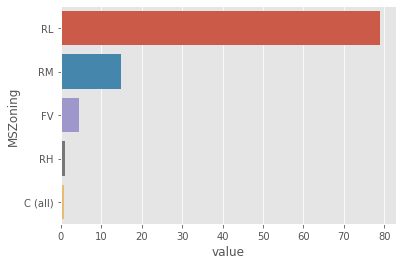

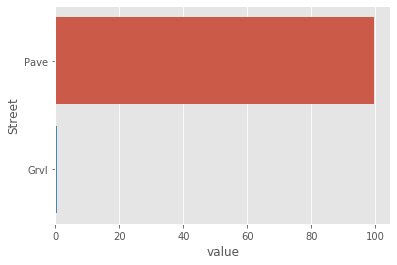

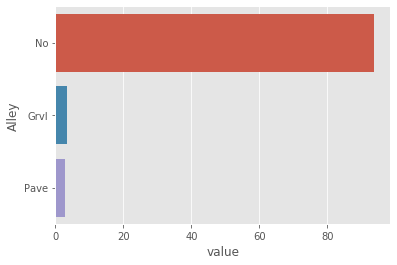

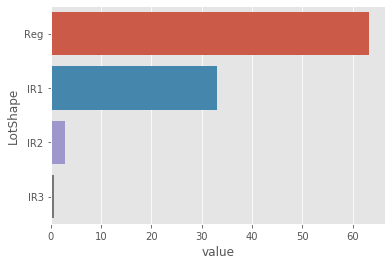

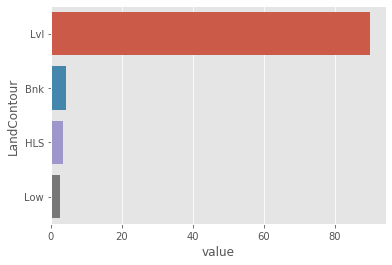

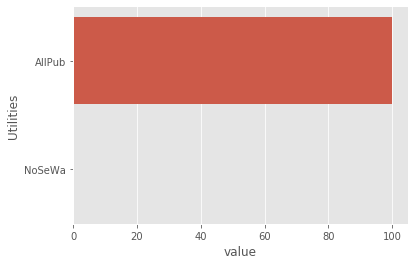

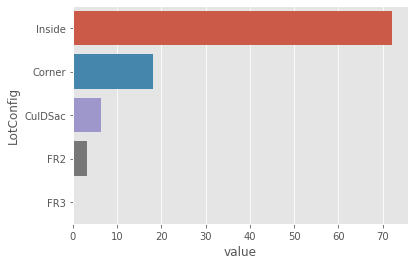

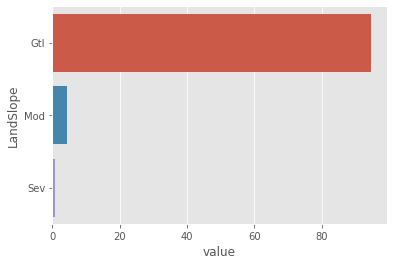

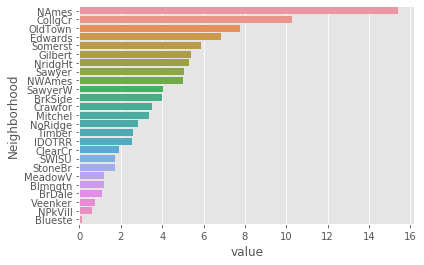

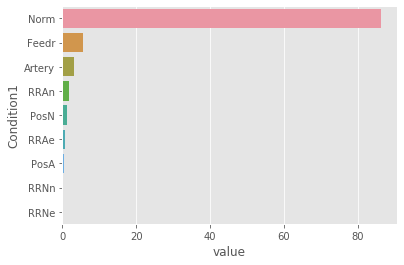

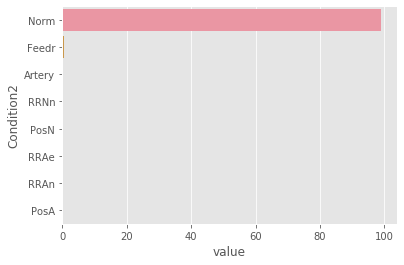

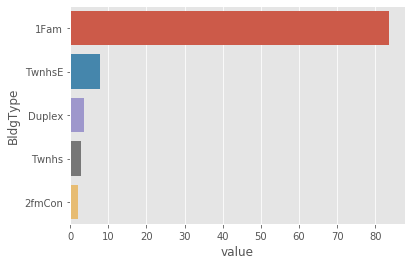

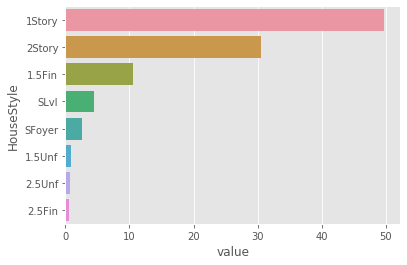

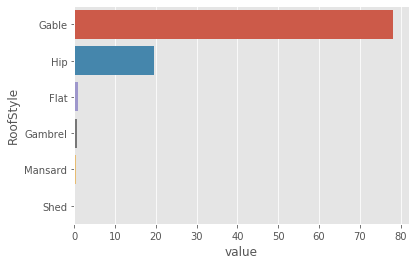

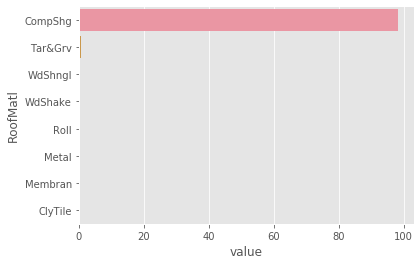

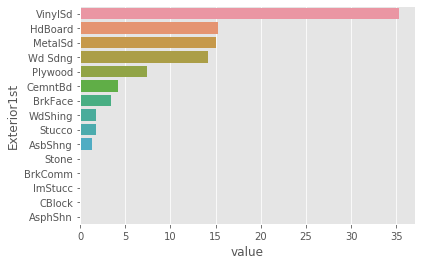

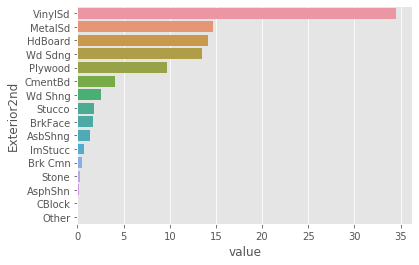

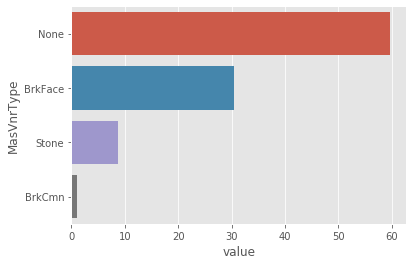

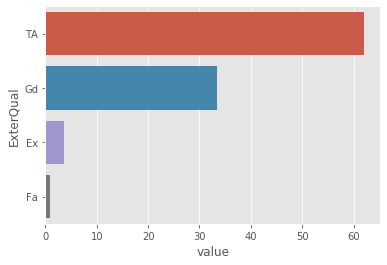

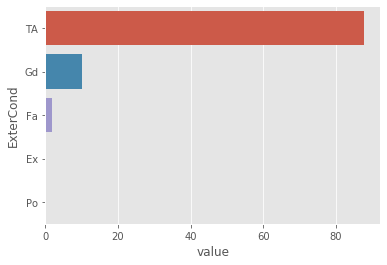

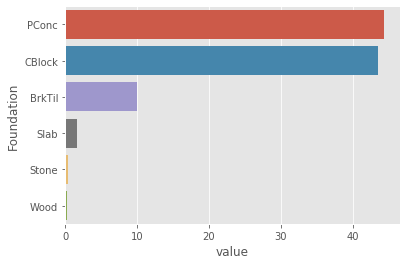

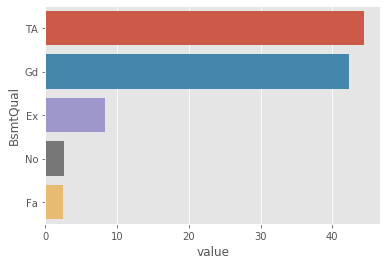

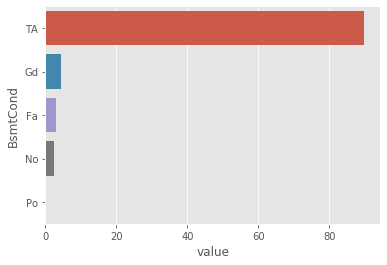

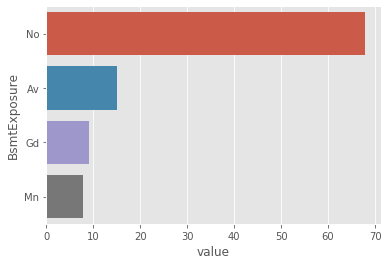

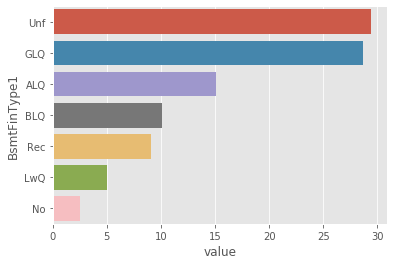

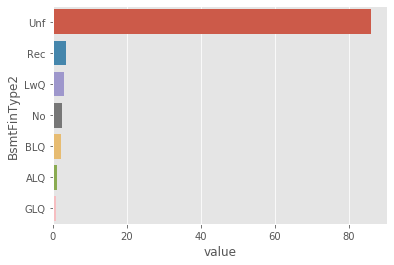

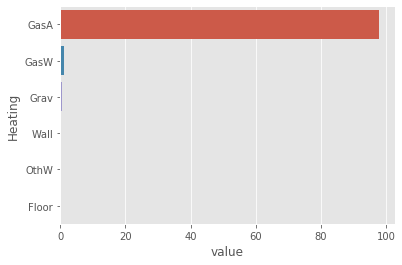

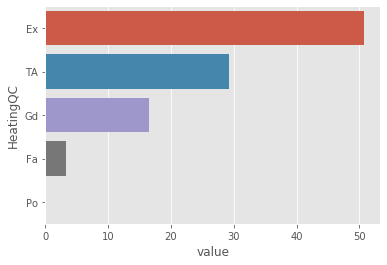

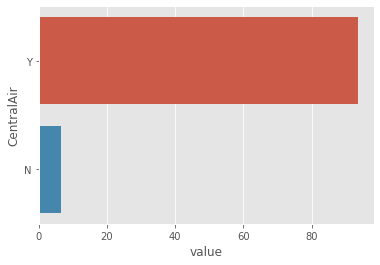

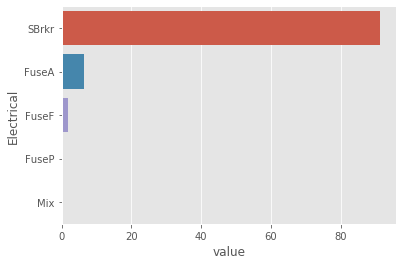

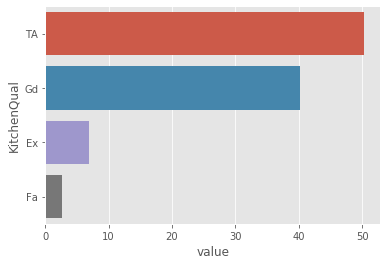

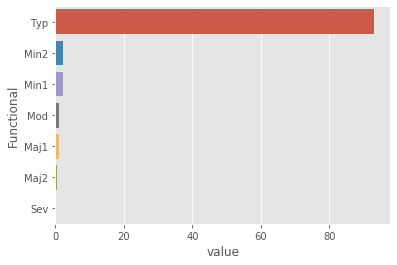

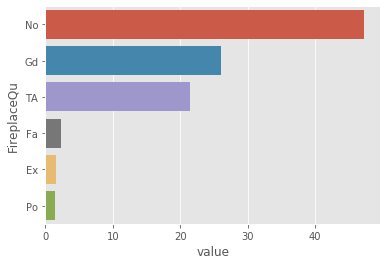

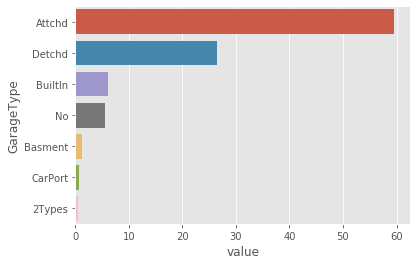

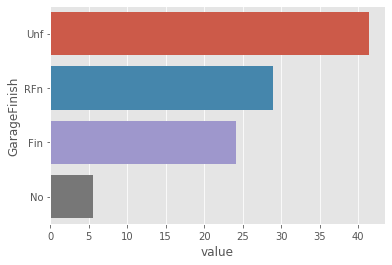

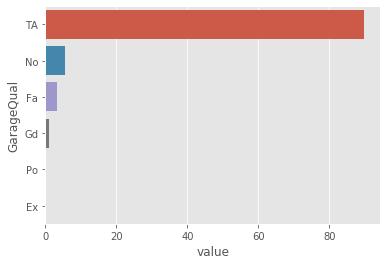

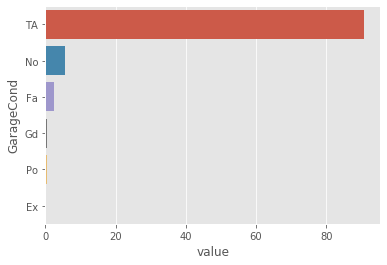

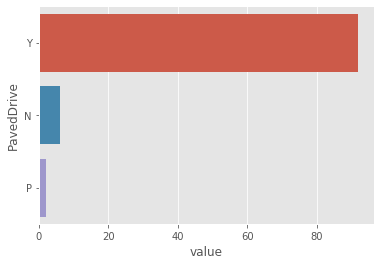

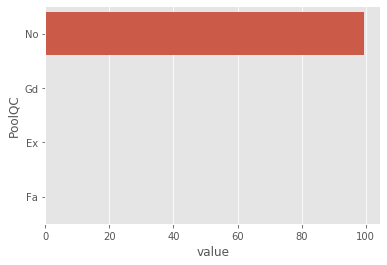

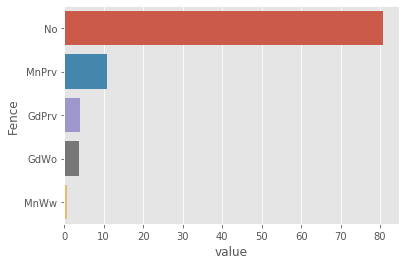

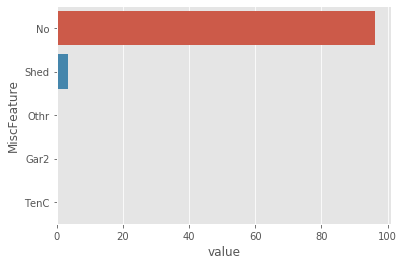

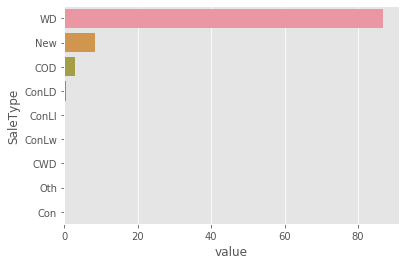

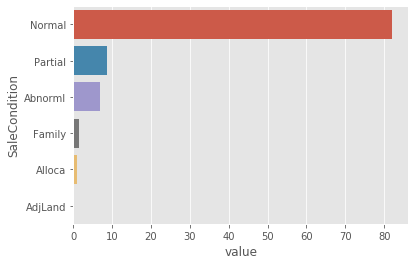

In [607]:
# select all columns having Object datatype 
obj_cols = house.select_dtypes(include ='object').columns

for i in obj_cols:
    df_1 = pd.DataFrame(100*house[i].value_counts(normalize = True)).reset_index()
    df_1.columns = [i, 'value']
    sns.barplot(y = i, x = 'value', data = df_1)
    plt.yticks(fontsize = 10)
    plt.style.use('ggplot')
    plt.show()

### 3. Inspecting Categorical Variables

#### Dropping Variabels with high bias
These variables would not contribute much in the regression problem we have. 

In [608]:
delete_cols = ["MSZoning" ,"Street", "Alley", "LandContour", "LotConfig",
               "Utilities", "LandSlope","Condition1", "Condition2",
               "BldgType","RoofMatl", "RoofStyle", "ExterCond","BsmtCond",
               "BsmtExposure", "BsmtFinType2", "Heating", "CentralAir",
               "Electrical","Functional","GarageCond", "PavedDrive",
               "SaleType", "SaleCondition", "GarageQual", "PoolQC",
              "Fence", "MiscFeature"]

In [609]:
house.drop(delete_cols, axis = 1, inplace = True)

#### Reducing Number of Categories

In [610]:
# Binning the Neighborhood variable

mapping1 = {
    'SawyerW' : 'Others',
    'BrkSide' : 'Others',
    'Crawfor' : 'Others',
    'Mitchel' : 'Others',
    'NoRidge' : 'Others',
    'Timber' : 'Others',
    'IDOTRR' : 'Others',
    'ClearCr' : 'Others',
    'SWISU' : 'Others',
    'StoneBr' : 'Others',
    'MeadowV' : 'Others',
    'Blmngtn' : 'Others',
    'BrDale' : 'Others',
    'Veenker' : 'Others',
    'NPkVill' : 'Others',
    'Blueste' : 'Others'}

house['Neighborhood'] = house['Neighborhood'].replace(mapping1)

In [611]:
# Binning the Exterior1st variable

mapping2 = {
    'Plywood' : 'Others',
    'CemntBd' : 'Others',
    'BrkFace' : 'Others',
    'WdShing' : 'Others',
    'Stucco' : 'Others',
    'AsbShng' : 'Others',
    'BrkComm' : 'Others',
    'Stone' : 'Others',
    'AsphShn' : 'Others',
    'ImStucc' : 'Others',
    'CBlock' : 'Others'}

house['Exterior1st'] = house['Exterior1st'].replace(mapping2)

In [612]:
# Binning the Exterior2nd variable

mapping3 = {
    'ImStucc' : 'Others',
    'Brk Cmn' : 'Others',
    'Stone' : 'Others',
    'AsphShn' : 'Others',
    'CBlock' : 'Others',
    'Other' : 'Others',
    'Stucco' : 'Others',
    'BrkFace' : 'Others',
    'AsbShng' : 'Others'}

house['Exterior2nd'] = house['Exterior2nd'].replace(mapping3)

In [613]:
# We would not want Id variable which is just an index to the dataset
house.drop("Id", axis = 1, inplace = True)

In [614]:
print(house.shape)

(1460, 48)


After binning some of the categories in some variables and dropping some variables which seeem to have high bias we have 48 variables to work with.

### 4. Univariate Analysis

#### Inspecting some of the Continuous variables to observe any patterns

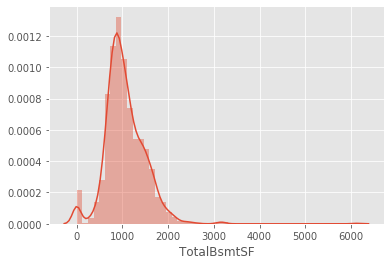

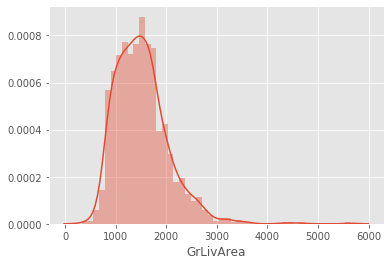

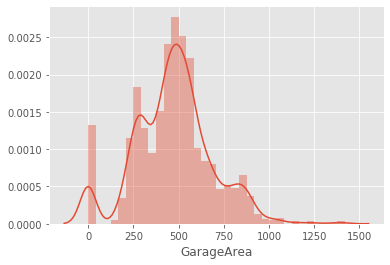

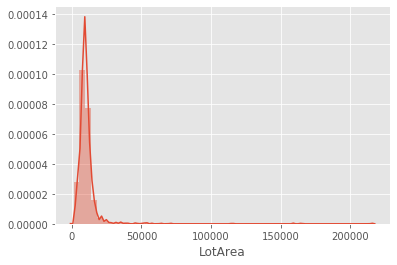

In [615]:
desc_list = ["TotalBsmtSF", "GrLivArea",
             "GarageArea", "LotArea"]

for i in desc_list:
    sns.distplot(house[i])
    plt.show()

We can observe that 'TotalBsmtSF', 'GrLivArea and 'LotArea' are skewed towards right meaning there are some outliers. But the overall shape of the distribution is looking close to the normal bell-curve. This gives us idea that we surely need to scale the data before it goes to the model as input. Also, Let us look at the box plot for same variables to get more intuition. 

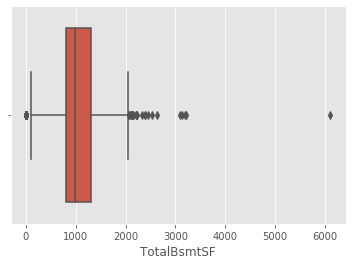

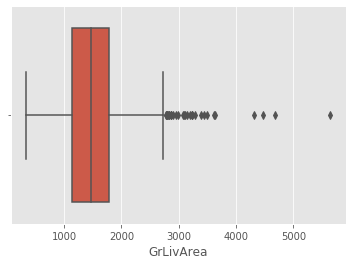

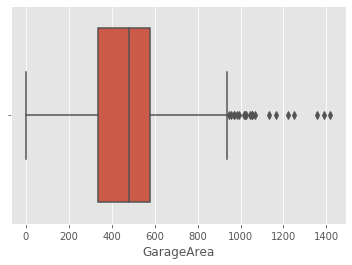

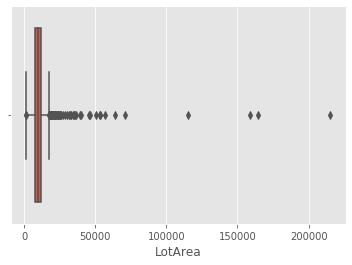

In [616]:
for i in desc_list:
    sns.boxplot(house[i])
    plt.show()

We can get an intuition that houses which have larger than average area in the Lot, Garage and Living area would have higher sale price.

### 5. Bivariate Analysis

Let's look at continuous variables with respect to target variable.

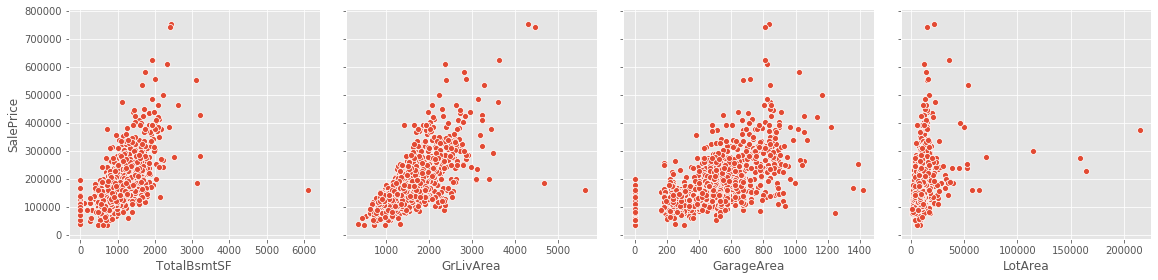

In [617]:
sns.pairplot(house, x_vars=desc_list, y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

1. TotalBasment area Vs. target seems to have positive linear relation with some cases of properties with no Basement
2. GroundLiving area Vs. target also seem to have positive linear relation with some cases of outliers with larger than usual area
3. GarageArea Vs. target seem to have positive linear relation with some instances of properties with no Garage. Also, we can notice some instances of larger then usual area
4. LotArea Vs. target shows interesting relationship with only a handful of instances which are not following the norm and have larger then usual area. Whereas, most of the houses have average 10516.82 sqft of area (As seen in the summary stats above)

Let's look at other variables to develop more intuition around the data.

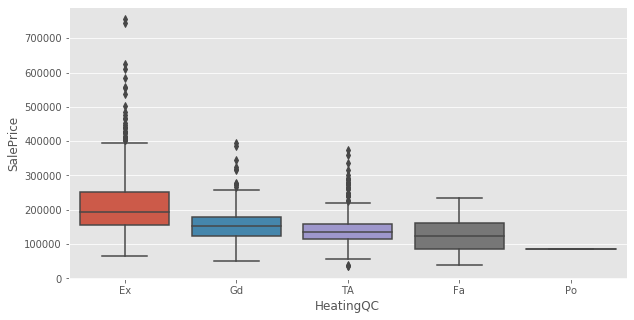

In [618]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house)
plt.show()

In [619]:
house.HeatingQC.describe()

count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object

In [620]:
100*house.HeatingQC.value_counts(normalize=True)

Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64

We can notice that about 50% of the houses have Excellent Heating quality.Whereas, about 30% of the houses seem to have Average quality of Heating. Also, we can clearly see expected relationship bwwtween Higher Price of houses with Excellent Heating rating.

In [621]:
house.PoolArea.describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

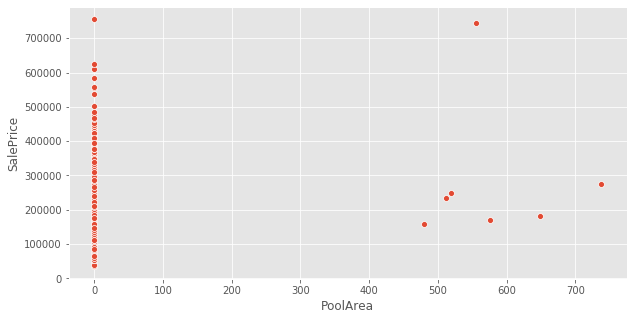

In [622]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'PoolArea', y = 'SalePrice', data = house)
plt.show()

It seems like most of the houses do not have pool hence the datapoints are stacked in a vertical at 0. Let's look at the Bedroom realted feature.

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


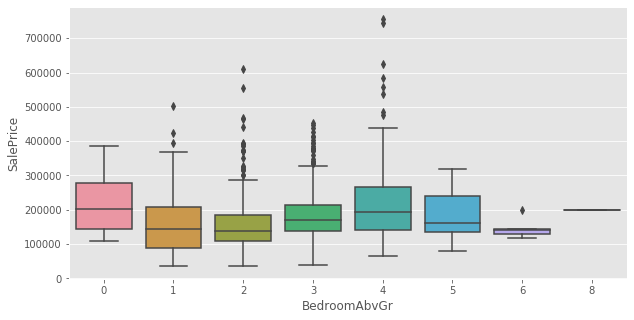

In [623]:
print(house.BedroomAbvGr.describe())
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'BedroomAbvGr', y = 'SalePrice', data = house)
plt.show()

From the above information we can notice that most of the properties have about 3 bedrooms with mean saleprice between 150000 and 200000 for such houses. We can also see that maximum saleprice of the house is reaching exceptionally high when it has 4 bedrooms. To our surprise we can also notice that houses with More than 5 Bedrooms do no have higher SalePrice when compared to those with lesser number of Bedrooms. This could be because, other facilities and features of such houses would not be at par.

In [624]:
ordinal_cols = ["KitchenQual","ExterQual", "HeatingQC"]

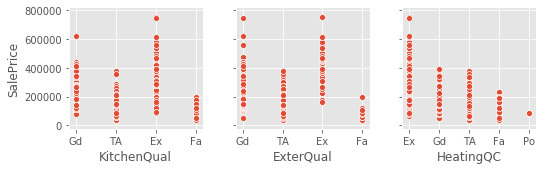

In [625]:
sns.pairplot(house, x_vars=ordinal_cols, y_vars='SalePrice', kind='scatter')
plt.show()

In few of the columns we can notice that the values are showing ordinal characteristic of quality like, Excellent > Average > Fair > Poor.
We can manually encode these values to numeric type.

In [626]:
# Replacing values 

mapping4 = {
    'Po' : 0,
    'Fa' : 1,
    'TA' : 2,
    'Gd' : 3,
    'Ex' : 4}

for i in ordinal_cols:
    house[i] = house[i].replace(mapping4)

In [627]:
# Validating if the replacement worked
for i in ordinal_cols:
    print(house[i].value_counts())

2    735
3    586
4    100
1     39
Name: KitchenQual, dtype: int64
2    906
3    488
4     52
1     14
Name: ExterQual, dtype: int64
4    741
2    428
3    241
1     49
0      1
Name: HeatingQC, dtype: int64


The replacement to numeric seem to have worked well. Now let's look at heatmap of complete data.

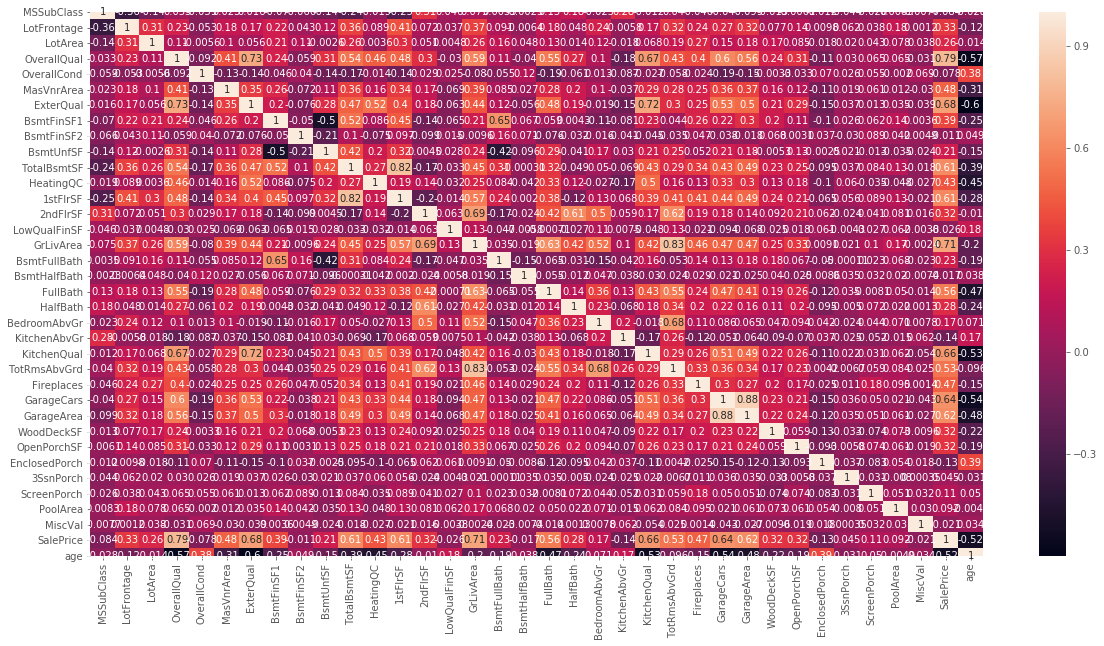

In [628]:
plt.figure(figsize = (20,10))
sns.heatmap(house.corr(),annot = True)
plt.show()

#### Inspecting Distribution of the Target Variable (SalePrice)

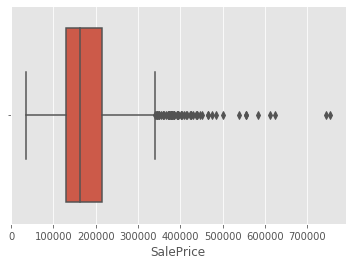

In [629]:
sns.boxplot(house['SalePrice'])
plt.show()

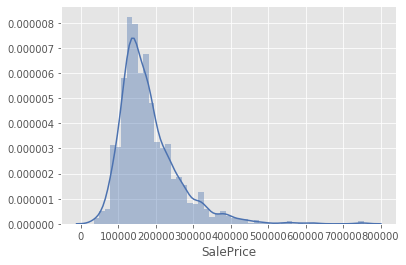

In [630]:
sns.set_color_codes()
ax = sns.distplot(house["SalePrice"], color="b")

We can observe below that the distribution of SalePrice Variable is Skewed towards Right. This indicates the presence of outliers. Since, we would like to make prediction of the house price on the complete range of price present in the data, it would make more sense to transform the data instead of performing capping or deletion of such data points.

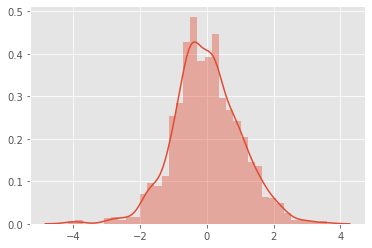

In [631]:
# Transforming the values in the SalePrice column
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformed = pt.fit_transform(house[['SalePrice']])

# Checking the distribution of the transformed data
sns.distplot(transformed)

In [632]:
# Adding transformed values into the dataframe
house["target"] = transformed

# Validating if the transpose worked fine
house.loc[:5,["SalePrice", "target"]]

,SalePrice,target
0,208500,0.571155
1,181500,0.227627
2,223500,0.741869
3,140000,-0.425386
4,250000,1.015293
5,143000,-0.371565


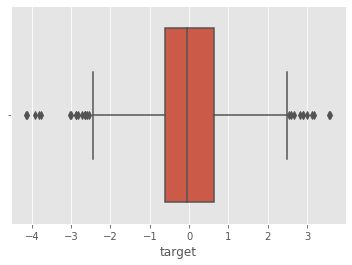

In [633]:
sns.boxplot(house['target'])
plt.show()

We can observe that the power transformation has worked well and now newly created 'target' variable(SalePrice) is normally distributed with mean = 0.
Now we can drop the redundant 'SalePrice' column.

In [634]:
# Dropping SalePrice column
house.drop("SalePrice", axis = 1, inplace = True)

### 6. Data Preparation
    - Creating Dummy variables
    - Divide data into Train and Test set
    - Perform Scaling on continuous variables
    - Dividing data into X and y (to feed into model)

In [635]:
print(house.shape)
house.info()

(1460, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
Neighborhood     1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null int64
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
HeatingQC        1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1

In [636]:
house.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,age,target
0,60,65.0,8450,Reg,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,196.0,3,PConc,Gd,GLQ,706,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,No,Attchd,RFn,2,548,0,61,0,0,0,0,0,17,0.571155
1,20,80.0,9600,Reg,Others,1Story,6,8,MetalSd,MetalSd,None,0.0,2,CBlock,Gd,ALQ,978,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,0,44,0.227627
2,60,68.0,11250,IR1,CollgCr,2Story,7,5,VinylSd,VinylSd,BrkFace,162.0,3,PConc,Gd,GLQ,486,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,0,19,0.741869
3,70,60.0,9550,IR1,Others,2Story,7,5,Wd Sdng,Wd Shng,None,0.0,2,BrkTil,TA,ALQ,216,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,0,105,-0.425386
4,60,84.0,14260,IR1,Others,2Story,8,5,VinylSd,VinylSd,BrkFace,350.0,3,PConc,Gd,GLQ,655,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,0,20,1.015293


#### Creating Train-Test Split

In [637]:
X = house.drop('target',axis=1)
y = house[['target']]

In [638]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtQual,BsmtFinType1,FireplaceQu,GarageType,GarageFinish
0,Reg,CollgCr,2Story,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,No,Attchd,RFn
1,Reg,Others,1Story,MetalSd,MetalSd,None,CBlock,Gd,ALQ,TA,Attchd,RFn
2,IR1,CollgCr,2Story,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,TA,Attchd,RFn
3,IR1,Others,2Story,Wd Sdng,Wd Shng,None,BrkTil,TA,ALQ,Gd,Detchd,Unf
4,IR1,Others,2Story,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,TA,Attchd,RFn


In [639]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_Somerst,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [640]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [641]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [642]:
from sklearn.preprocessing import scale
allcols = X.columns
scaler = StandardScaler()
scaler.fit(X)
X.columns = allcols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'age', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Others', 'Neighborhood_Sawyer', 'Neighborhood_Somerst',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Exterior1st_M

In [643]:
# Train-Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)

In [644]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_vif = Xtrain
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,LowQualFinSF,inf
8,BsmtFinSF2,inf
15,GrLivArea,inf
80,BsmtFinType1_No,inf
13,2ndFlrSF,inf
12,1stFlrSF,inf
10,TotalBsmtSF,inf
9,BsmtUnfSF,inf
75,BsmtQual_No,inf
7,BsmtFinSF1,inf


We can notice that there are bunch of features which are inter-related hence larger VIF values.

In [645]:
# Limiting ourselves to select top 25 features at first
ridge = Ridge()
rfe = RFE(ridge, 25)           
rfe = rfe.fit(Xtrain, ytrain)

In [646]:
rfe_cols = Xtrain.columns[rfe.support_]

In [647]:
# 25 Selected features by RFE
rfe_cols

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'LotShape_IR2', 'LotShape_IR3',
       'Neighborhood_Edwards', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'HouseStyle_2.5Fin', 'HouseStyle_2Story',
       'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No',
       'BsmtQual_TA', 'BsmtFinType1_No', 'BsmtFinType1_Unf', 'FireplaceQu_Po',
       'GarageType_Attchd', 'GarageType_BuiltIn'],
      dtype='object')

### 7. Modeling
- Ridge Regression
- Lasso Regression
- Identifying best hyperparameter (Lambda/Alpha)
- Identifying best features

#### Ridge Regression

In [648]:
# list of alphas to tune
params = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 15.0, 20.0]}
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(Xtrain[rfe_cols], ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 15.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [649]:
model_cv = pd.DataFrame(model_cv.cv_results_)
#model_cv.head()

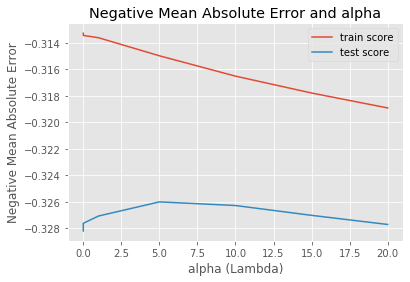

In [650]:
# plotting mean test and train scores with alpha 
model_cv['param_alpha'] = model_cv['param_alpha'].astype('int32')

# plotting
plt.plot(model_cv['param_alpha'], model_cv['mean_train_score'])
plt.plot(model_cv['param_alpha'], model_cv['mean_test_score'])
plt.xlabel('alpha (Lambda)')
plt.ylabel('Negative Mean Absolute Error')
#plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score']) #, loc='upper left'
plt.show()

#### Lasso Regression

In [651]:
lasso = Lasso()

# list of alphas to tune
# params = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 15.0, 20.0]}
params = {'alpha': [0.1, 1.5, 3.0, 4.5, 7.0, 15.0]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(Xtrain, ytrain) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 1.5, 3.0, 4.5, 7.0, 15.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

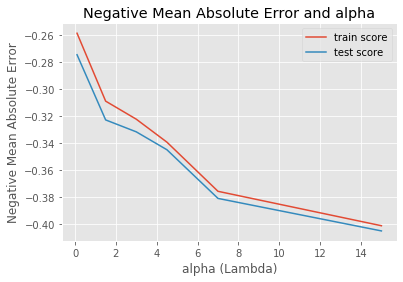

In [652]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha (Lambda)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

#### Learning with best Lambda for Lasso and Ridge Regression.

In [653]:
# model with optimal alpha
# lasso regression
from sklearn import metrics
lm1 = Lasso(alpha=1.8)
lm1.fit(Xtrain, ytrain)

# predict
y_train_pred = lm1.predict(Xtrain)
print("r2 score - Lasso Regression")
print(metrics.r2_score(y_true=ytrain, y_pred=y_train_pred))
y_test_pred = lm1.predict(Xtest)
print(metrics.r2_score(y_true=ytest, y_pred=y_test_pred))

r2 score - Lasso Regression
0.7514970570852915
0.7734111804222108


In [654]:
# lasso model parameters
lasso_parameters = list(lm1.coef_)
lasso_parameters.insert(0, lm1.intercept_)
lasso_parameters = [np.round(x, 3) for x in lasso_parameters]
lasso_cols = Xtrain.columns
lasso_cols = lasso_cols.insert(0, "constant")
lasso_reg_df = pd.DataFrame(list(zip(lasso_cols,flat_list)), columns=['lasso_cols','lasso_parameters'])
lasso_reg_df.sort_values(by='lasso_parameters', ascending=False)

,lasso_cols,lasso_parameters
3,LotArea,0.369
1,MSSubClass,0.298
7,ExterQual,0.252
25,Fireplaces,0.229
8,BsmtFinSF1,0.203
4,OverallQual,0.199
6,MasVnrArea,0.188
2,LotFrontage,0.177
24,TotRmsAbvGrd,0.153
12,HeatingQC,0.152


In [655]:
# model with optimal alpha
# Ridge regression
from sklearn import metrics
lm2 = Ridge(alpha=5)
lm2.fit(Xtrain[rfe_cols], ytrain)
#lm2.fit(Xtrain, ytrain)

# predict
y_train_pred = lm2.predict(Xtrain[rfe_cols])
print("r2 score - Ridge Regression")
print(metrics.r2_score(y_true=ytrain, y_pred=y_train_pred))
y_test_pred = lm2.predict(Xtest[rfe_cols])
print(metrics.r2_score(y_true=ytest, y_pred=y_test_pred))

r2 score - Ridge Regression
0.8128006073348283
0.8035273466933518


In [656]:
# Ridge model parameters
ridge_parameters = list(lm2.coef_)
ridge_parameters.insert(0, lm2.intercept_)
ridge_parameters = [np.round(x, 3) for x in ridge_parameters]
ridge_cols = Xtrain[rfe_cols].columns
ridge_cols = ridge_cols.insert(0, "constant")

flat_list = [item for sublist in ridge_parameters for item in sublist]
data_tuples = list(zip(ridge_cols,flat_list))
ridge_reg_df = pd.DataFrame(data_tuples, columns=['ridge_cols','ridge_parameters'])
ridge_reg_df.sort_values(by='ridge_parameters', ascending=False)

,ridge_cols,ridge_parameters
3,FullBath,0.382
1,OverallQual,0.288
7,GarageCars,0.250
25,GarageType_BuiltIn,0.249
8,LotShape_IR2,0.225
16,Foundation_Stone,0.222
4,HalfBath,0.208
14,HouseStyle_2.5Fin,0.190
6,Fireplaces,0.188
2,BsmtFullBath,0.177


In [657]:
# Top features which have better prediction power
print(ridge_reg_df[1:6])
print(lasso_reg_df[1:6])

     ridge_cols  ridge_parameters
1   OverallQual             0.288
2  BsmtFullBath             0.177
3      FullBath             0.382
4      HalfBath             0.208
5  KitchenAbvGr            -0.222
    lasso_cols  lasso_parameters
1   MSSubClass             0.298
2  LotFrontage             0.177
3      LotArea             0.369
4  OverallQual             0.199
5  OverallCond            -0.196


The company can focus on some of the above features which seem to best predict the saleprice of the houses.